In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

In [3]:
asymp = np.load('/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/asymp_cropped_no_norm.npy')
symp = np.load('/raid/mpsych/CACTAS/DATA/Nathan Arnett Calcification/symp_cropped_no_norm.npy')

In [4]:
labels = np.array([0]*len(asymp) + [1]*len(symp))
images = np.concatenate((asymp, symp))

In [5]:
X, y = shuffle(images, labels, random_state=0)

In [6]:
len(images)

1034

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=0)

In [59]:
rf = RandomForestClassifier(n_estimators=100)

In [60]:
X_train_raveled = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_val_raveled = X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2])

fitted = rf.fit(X_train_raveled, y_train)

In [61]:
y_pred = rf.predict(X_val_raveled)

In [62]:
sklearn.metrics.accuracy_score(y_val, y_pred)

0.8846153846153846

In [63]:
sklearn.metrics.f1_score(y_val, y_pred)

0.8867924528301887

In [64]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [65]:
y_val

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [97]:
asymp_test.shape

(876, 64, 64, 1)

In [98]:
symp_test.shape

(774, 64, 64, 1)

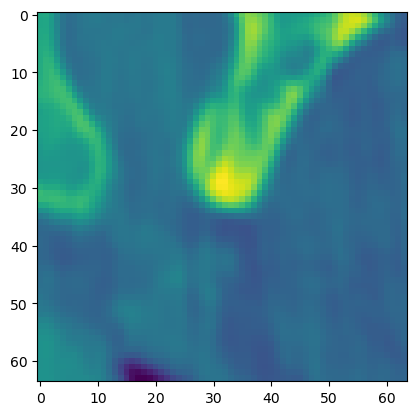

In [99]:
imshow(symp_test[0])

In [85]:
asymp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/asymp_cropped.npy')
symp_test = np.load('/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/symp_cropped.npy')

In [86]:
labels_test = np.array([0]*len(asymp_test) + [1]*len(symp_test))
images_test = np.concatenate((asymp_test, symp_test))

In [87]:
X_test, y_test = shuffle(images_test, labels_test, random_state=0)

In [88]:
X_test_raveled = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [89]:
y_pred = rf.predict(X_test_raveled)

In [90]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.5163636363636364

In [91]:
sklearn.metrics.f1_score(y_test, y_pred)

0.5067985166872683

In [92]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [93]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [94]:
sklearn.metrics.roc_auc_score(y_test, y_pred)

0.5171409861597819

In [95]:
sklearn.metrics.recall_score(y_test, y_pred)

0.5297157622739018

In [96]:
sklearn.metrics.precision_score(y_test, y_pred)

0.48578199052132703